<a href="https://colab.research.google.com/github/kabir-999/real-estate-price-predictor/blob/main/ML_MINI_PROJECTipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEB SCRAPING

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [6]:
base_url = "https://www.magicbricks.com/property-for-sale/residential-real-estate?proptype=Multistorey-Apartment,Builder-Floor,Studio-Apartment,Penthouse,Residential-House,Villa&BudgetMin=1.5-Crores&cityName=New-Delhi"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}


In [7]:
response = requests.get(url, headers=headers)
time.sleep(5)

NameError: name 'url' is not defined

In [ ]:
soup = BeautifulSoup(response.text, 'html.parser')
print(soup)

In [ ]:
properties = soup.find_all('div', class_='mb-srp__card__container')
print(properties)

In [ ]:
titles = soup.find_all('h2', class_='mb-srp__card--title')


for title in titles:
    print(title.text.strip())

In [ ]:
data = []

for property in properties:
    try:
        title = property.find('span', class_='m-srp-card__title').text.strip()
    except AttributeError:
        title = None

In [ ]:
for page in range(1, 11):
    print(f"Scraping Page {page}...")
    url = base_url.format(page)
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    properties = soup.find_all('div', class_='mb-srp__card')

    for property in properties:
        try:
            title = property.find('h2', class_='mb-srp__card--title').text.strip()
        except AttributeError:
            title = "N/A"

        try:
            location = property.find('div', class_='mb-srp__card--location').text.strip()
        except AttributeError:
            location = "N/A"

        try:
            price = property.find('div', class_='mb-srp__card__price--amount').text.strip()
        except AttributeError:
            price = "N/A"

        try:
            area = property.find('div', class_='mb-srp__card__summary--value').text.strip()
        except AttributeError:
            area = "N/A"

        summary_items = property.find_all('div', class_='mb-srp__card__summary__list--item')

        carpet_area, status, floor, transaction, furnishing, facing = "N/A", "N/A", "N/A", "N/A", "N/A", "N/A"
        overlooking, ownership, car_parking, bathroom, balcony = "N/A", "N/A", "N/A", "N/A", "N/A"

        for item in summary_items:
            label = item.find('div', class_='mb-srp__card__summary--label').text.strip()
            value = item.find('div', class_='mb-srp__card__summary--value').text.strip()

            if label == "Carpet Area":
                carpet_area = value
            elif label == "Status":
                status = value
            elif label == "Floor":
                floor = value
            elif label == "Transaction":
                transaction = value
            elif label == "Furnishing":
                furnishing = value
            elif label == "facing":
                facing = value
            elif label == "overlooking":
                overlooking = value
            elif label == "Ownership":
                ownership = value
            elif label == "Car Parking":
                car_parking = value
            elif label == "Bathroom":
                bathroom = value
            elif label == "Balcony":
                balcony = "Yes" if int(value) > 0 else "No"

        data.append({
            'Title': title,
            'Location': location,
            'Price': price,
            'Area': area,
            'Carpet Area': carpet_area,
            'Status': status,
            'Floor': floor,
            'Transaction': transaction,
            'Furnishing': furnishing,
            'Facing': facing,
            'Overlooking': overlooking,
            'Ownership': ownership,
            'Car Parking': car_parking,
            'Bathroom': bathroom,
            'Balcony': balcony
        })

    time.sleep(2)

df = pd.DataFrame(data)
df.to_csv('magicbricks_detailed_properties.csv', index=False)

print("Data scraped and saved to 'magicbricks_detailed_properties.csv'")

# Loading the dataset

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("/content/magicbricks_detailed_properties.csv")

# **EDA**

In [10]:
df.head()

,Title,Location,Price,Area,Carpet Area,Status,Floor,Transaction,Furnishing,Facing,Overlooking,Ownership,Car Parking,Bathroom,Balcony
0,4 BHK Builder Floor for Sale in New Friends Co...,NaN,竄ｹ7 Cr,3500 sqft,3500 sqft,Ready to Move,2 out of 3,Resale,Unfurnished,East,Garden/Park,NaN,NaN,5,Yes
1,"3 BHK Builder Floor for Sale in Kishangarh, Va...",NaN,竄ｹ1.60 Cr,1300 sqft,1300 sqft,Ready to Move,4 out of 5,New Property,Semi-Furnished,North,Main Road,Freehold,1 Covered,3,Yes
2,4 BHK Builder Floor for Sale in Greater Kailas...,NaN,竄ｹ14.25 Cr,560 sqyrd,NaN,Ready to Move,Ground out of 4,New Property,Semi-Furnished,North,Garden/Park,Freehold,5 Covered,5,Yes
3,3 BHK Builder Floor for Sale in Safdarjung Enc...,NaN,竄ｹ7.50 Cr,200 sqyrd,NaN,Ready to Move,Ground out of 4,New Property,Semi-Furnished,North,Garden/Park,Freehold,2 Covered,3,Yes
4,4 BHK Builder Floor for Sale in Safdarjung Enc...,NaN,竄ｹ6.50 Cr,2100 sqft,2100 sqft,Ready to Move,Ground out of 5,New Property,Semi-Furnished,North,Garden/Park,Freehold,2 Covered,4,Yes


# Dropping NULL column

In [11]:
df.drop(columns=['Location'], inplace=True)

In [12]:
df['Price'] = df['Price'].str.replace(r'[^\d.]', '', regex=True).astype(float)
df['Area'] = df['Area'].str.replace(r'[^\d.]', '', regex=True).astype(float)

In [13]:
df.head(10)

,Title,Price,Area,Carpet Area,Status,Floor,Transaction,Furnishing,Facing,Overlooking,Ownership,Car Parking,Bathroom,Balcony
0,4 BHK Builder Floor for Sale in New Friends Co...,7.00,3500.0,3500 sqft,Ready to Move,2 out of 3,Resale,Unfurnished,East,Garden/Park,NaN,NaN,5,Yes
1,"3 BHK Builder Floor for Sale in Kishangarh, Va...",1.60,1300.0,1300 sqft,Ready to Move,4 out of 5,New Property,Semi-Furnished,North,Main Road,Freehold,1 Covered,3,Yes
2,4 BHK Builder Floor for Sale in Greater Kailas...,14.25,560.0,NaN,Ready to Move,Ground out of 4,New Property,Semi-Furnished,North,Garden/Park,Freehold,5 Covered,5,Yes
3,3 BHK Builder Floor for Sale in Safdarjung Enc...,7.50,200.0,NaN,Ready to Move,Ground out of 4,New Property,Semi-Furnished,North,Garden/Park,Freehold,2 Covered,3,Yes
4,4 BHK Builder Floor for Sale in Safdarjung Enc...,6.50,2100.0,2100 sqft,Ready to Move,Ground out of 5,New Property,Semi-Furnished,North,Garden/Park,Freehold,2 Covered,4,Yes
5,2 BHK House for Sale in Munirka New Delhi,1.58,1150.0,1150 sqft,Ready to Move,NaN,Resale,Semi-Furnished,East,"Garden/Park, Main Road",Freehold,NaN,2,Yes
6,4 BHK Builder Floor for Sale in Vasant Vihar N...,8.75,400.0,400 sqyrd,Ready to Move,2 out of 3,Resale,Unfurnished,South - East,Main Road,Freehold,2 Covered,4,Yes
7,> 10 BHK Villa for Sale in Greater Kailash 1 N...,40.00,500.0,500 sqyrd,Ready to Move,NaN,Resale,Semi-Furnished,NaN,Garden/Park,Freehold,"2 Covered,",> 10,Yes
8,"3 BHK Apartment for Sale in Moti Nagar, Kirti ...",2.80,1100.0,1100 sqft,Ready to Move,17 out of 24,Resale,Semi-Furnished,North - East,"Garden/Park, Pool, Main Road",Freehold,1 Covered,2,Yes
9,4 BHK Builder Floor for Sale in Vasant Vihar N...,12.00,3300.0,3300 sqft,Ready to Move,5 out of 5,New Property,Semi-Furnished,South,NaN,Freehold,2 Covered,5,Yes


# Remove Outliers

In [14]:
df = df[df['Price'] <= df['Price'].quantile(0.99)]
df = df[df['Area'] <= df['Area'].quantile(0.99)]

# Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encodable_cols = ['Status', 'Transaction', 'Furnishing', 'Facing', 'Ownership', 'Balcony']
label_encoder = LabelEncoder()
for col in label_encodable_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [17]:
df['Bathroom'] = df['Bathroom'].astype(str).str.extract('(\d+)').astype(float)
df['Car Parking'] = df['Car Parking'].astype(str).str.extract('(\d+)').astype(float)
df['Floor'] = df['Floor'].astype(str).str.extract('(\d+)').astype(float)

In [18]:
df.head(10)

,Title,Price,Area,Carpet Area,Status,Floor,Transaction,Furnishing,Facing,Overlooking,Ownership,Car Parking,Bathroom,Balcony
0,4 BHK Builder Floor for Sale in New Friends Co...,7.00,3500.0,3500 sqft,0,2.0,1,2,0,Garden/Park,4,NaN,5.0,0
1,"3 BHK Builder Floor for Sale in Kishangarh, Va...",1.60,1300.0,1300 sqft,0,4.0,0,1,1,Main Road,1,1.0,3.0,0
2,4 BHK Builder Floor for Sale in Greater Kailas...,14.25,560.0,NaN,0,4.0,0,1,1,Garden/Park,1,5.0,5.0,0
3,3 BHK Builder Floor for Sale in Safdarjung Enc...,7.50,200.0,NaN,0,4.0,0,1,1,Garden/Park,1,2.0,3.0,0
4,4 BHK Builder Floor for Sale in Safdarjung Enc...,6.50,2100.0,2100 sqft,0,5.0,0,1,1,Garden/Park,1,2.0,4.0,0
5,2 BHK House for Sale in Munirka New Delhi,1.58,1150.0,1150 sqft,0,NaN,1,1,0,"Garden/Park, Main Road",1,NaN,2.0,0
6,4 BHK Builder Floor for Sale in Vasant Vihar N...,8.75,400.0,400 sqyrd,0,2.0,1,2,5,Main Road,1,2.0,4.0,0
8,"3 BHK Apartment for Sale in Moti Nagar, Kirti ...",2.80,1100.0,1100 sqft,0,17.0,1,1,2,"Garden/Park, Pool, Main Road",1,1.0,2.0,0
9,4 BHK Builder Floor for Sale in Vasant Vihar N...,12.00,3300.0,3300 sqft,0,5.0,0,1,4,NaN,1,2.0,5.0,0
10,4 BHK Builder Floor for Sale in Greater Kailas...,7.00,2000.0,2000 sqft,0,1.0,0,2,2,NaN,1,2.0,4.0,1


In [19]:
df['Price_per_sqft'] = df['Price'] / (df['Area'] + 1)

In [20]:
df.fillna(df.select_dtypes(include='number').median(), inplace=True)

In [21]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-21-523fbb2d88a2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [22]:
df.head()

,Title,Price,Area,Carpet Area,Status,Floor,Transaction,Furnishing,Facing,Overlooking,Ownership,Car Parking,Bathroom,Balcony,Price_per_sqft
0,4 BHK Builder Floor for Sale in New Friends Co...,7.00,3500.0,3500 sqft,0,2.0,1,2,0,Garden/Park,4,1.0,5.0,0,0.001999
1,"3 BHK Builder Floor for Sale in Kishangarh, Va...",1.60,1300.0,1300 sqft,0,4.0,0,1,1,Main Road,1,1.0,3.0,0,0.001230
2,4 BHK Builder Floor for Sale in Greater Kailas...,14.25,560.0,1500 sqft,0,4.0,0,1,1,Garden/Park,1,5.0,5.0,0,0.025401
3,3 BHK Builder Floor for Sale in Safdarjung Enc...,7.50,200.0,1500 sqft,0,4.0,0,1,1,Garden/Park,1,2.0,3.0,0,0.037313
4,4 BHK Builder Floor for Sale in Safdarjung Enc...,6.50,2100.0,2100 sqft,0,5.0,0,1,1,Garden/Park,1,2.0,4.0,0,0.003094


# **Vizualization**

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Area vs Price

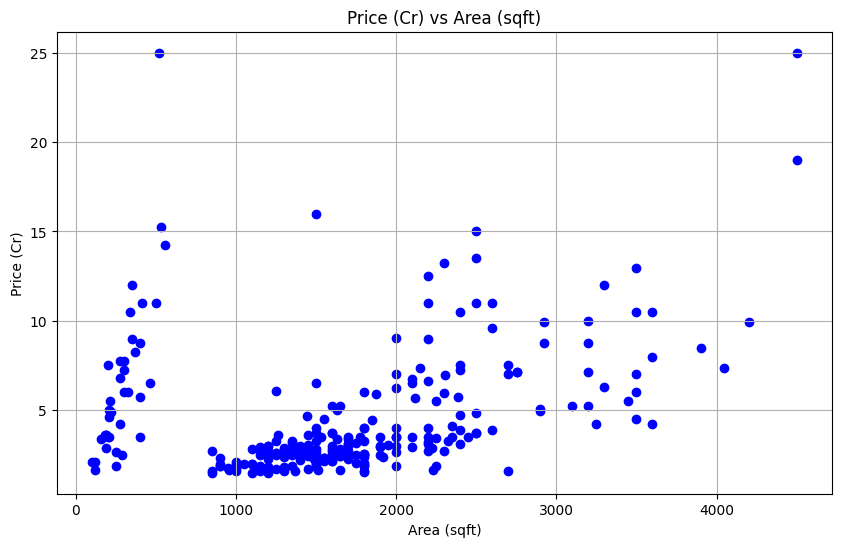

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Area'], df['Price'], color='blue')
plt.title('Price (Cr) vs Area (sqft)')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (Cr)')
plt.grid(True)
plt.show()

# Distribution of Price

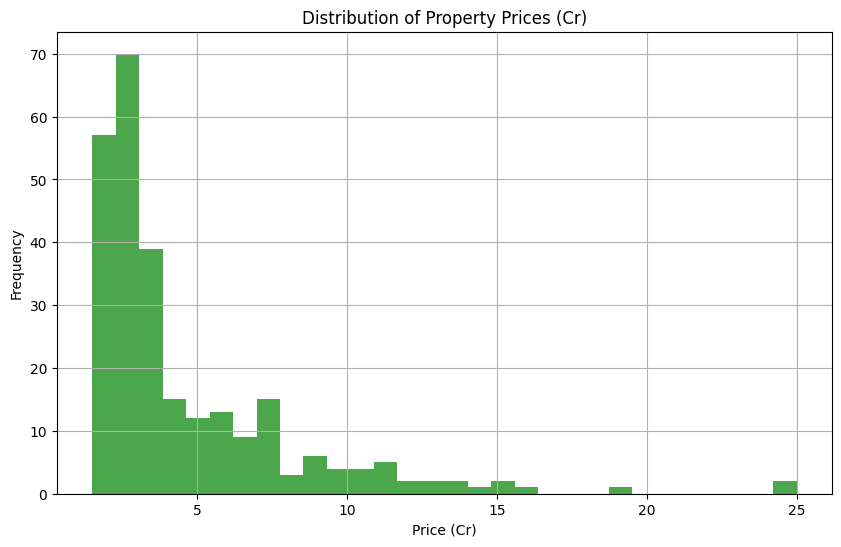

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'].dropna(), bins=30, color='green', alpha=0.7)
plt.title('Distribution of Property Prices (Cr)')
plt.xlabel('Price (Cr)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of Area

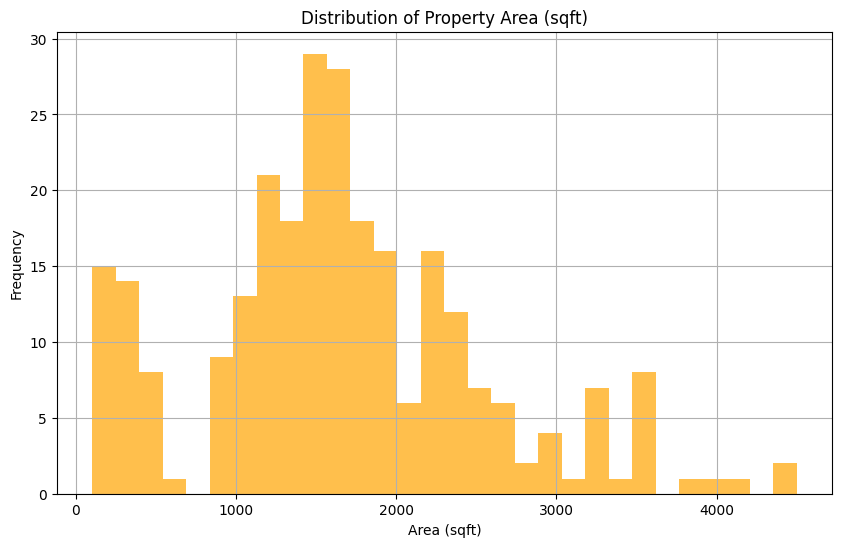

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(df['Area'].dropna(), bins=30, color='orange', alpha=0.7)
plt.title('Distribution of Property Area (sqft)')
plt.xlabel('Area (sqft)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Bathroom vs Price

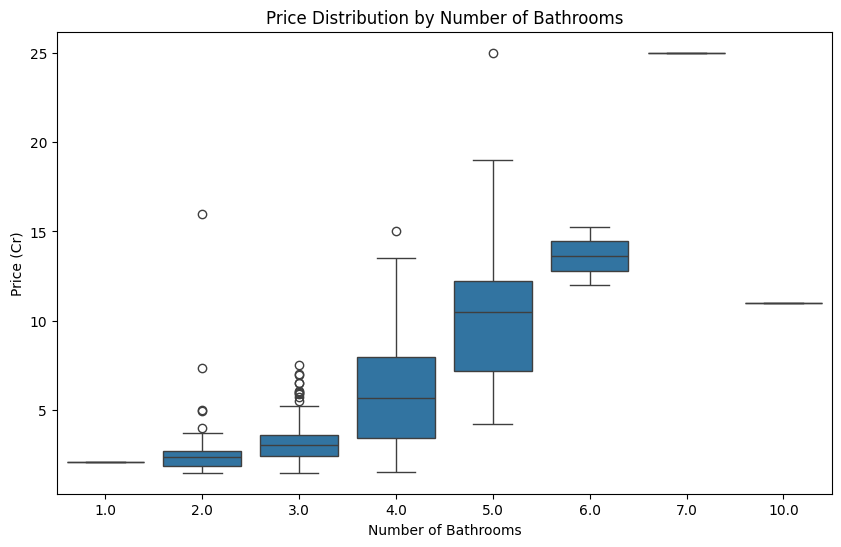

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bathroom', y='Price', data=df)
plt.title('Price Distribution by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (Cr)')
plt.show()

# Heatmap

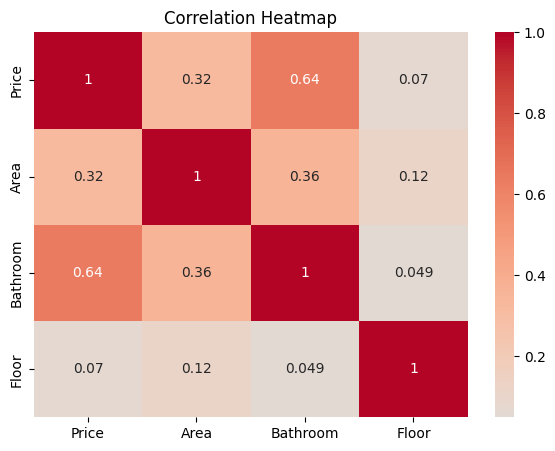

In [28]:
numeric_cols = ['Price', 'Area', 'Bathroom','Floor']
corr = df[numeric_cols].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Ownership detail

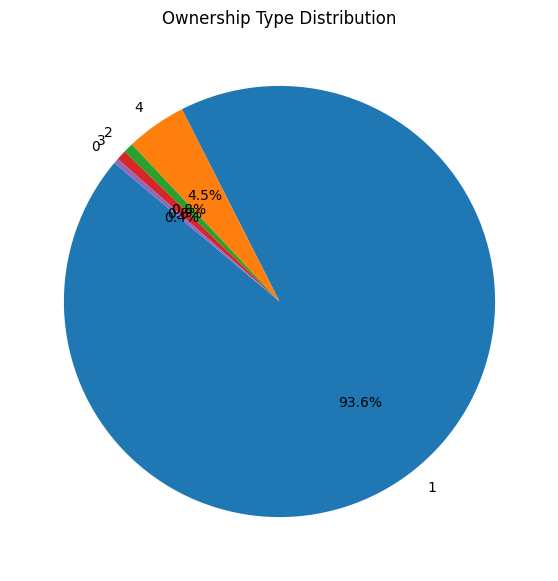

In [29]:
ownership_counts = df['Ownership'].value_counts()
plt.figure(figsize=(7, 7 ))
plt.pie(ownership_counts, labels=ownership_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ownership Type Distribution')
plt.show()

# **MODEL BUILDING**

# XGBOOST

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, f1_score, classification_report

In [31]:
X = df.drop(columns=['Title', 'Price', 'Carpet Area', 'Overlooking'])
y = df['Price']

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
X = df.drop(columns=['Title', 'Price', 'Carpet Area', 'Overlooking'])
y = df['Price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [35]:
gbr_model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    random_state=42
)

In [36]:
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=6, n_estimators=500,
                          random_state=42, subsample=0.8)

In [37]:
y_pred_gbr = gbr_model.predict(X_test)

In [38]:
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Mean Squared Error (MSE): {mse_gbr:.2f}")
print(f"R² Score (Accuracy): {r2_gbr:.2%}")

Mean Squared Error (MSE): 0.70
R² Score (Accuracy): 88.55%


In [39]:
price_bins = [0, df['Price'].quantile(0.33), df['Price'].quantile(0.66), df['Price'].max()]
price_labels = ['Low', 'Medium', 'High']

In [40]:
y_test_class = pd.cut(y_test, bins=price_bins, labels=price_labels)
y_pred_class = pd.cut(y_pred_gbr, bins=price_bins, labels=price_labels)

In [41]:
conf_matrix = confusion_matrix(y_test_class, y_pred_class, labels=price_labels)

In [42]:
f1 = f1_score(y_test_class, y_pred_class, average='weighted')
classification_rep = classification_report(y_test_class, y_pred_class)

In [43]:
print(f"Weighted F1 Score: {f1:.2f}")
print("Classification Report:\n", classification_rep)

Weighted F1 Score: 0.89
Classification Report:
               precision    recall  f1-score   support

        High       0.81      1.00      0.90        13
         Low       0.94      0.89      0.91        18
      Medium       0.90      0.82      0.86        22

    accuracy                           0.89        53
   macro avg       0.88      0.90      0.89        53
weighted avg       0.89      0.89      0.89        53



In [46]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = gbr_model.predict(X_train)

y_test_pred = gbr_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
print(f'Training R²: {train_r2:.4f}')

test_r2 = r2_score(y_test, y_test_pred)
print(f'Testing R²: {test_r2:.4f}')

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Training MSE: {train_mse:.4f}')
print(f'Testing MSE: {test_mse:.4f}')


Training R²: 1.0000
Testing R²: 0.8855
Training MSE: 0.0000
Testing MSE: 0.7031


# **Random Forest**

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
X = df.drop(columns=['Title', 'Price', 'Carpet Area', 'Overlooking'])
y = df['Price']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [93]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [94]:
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f} Cr')
print(f'R2 Score: {r2:.2f}')

RMSE: 1.01 Cr
R2 Score: 0.83


In [95]:
y_pred_rf = rf.predict(X_test)

In [96]:
price_bins = [0, df['Price'].quantile(0.33), df['Price'].quantile(0.66), df['Price'].max()]
price_labels = ['Low', 'Medium', 'High']

In [97]:
y_test_class = pd.cut(y_test, bins=price_bins, labels=price_labels)
y_pred_class = pd.cut(y_pred_rf, bins=price_bins, labels=price_labels)


In [98]:
conf_matrix = confusion_matrix(y_test_class, y_pred_class, labels=price_labels)

In [99]:
f1 = f1_score(y_test_class, y_pred_class, average='weighted')
classification_rep = classification_report(y_test_class, y_pred_class)

In [100]:
print(f"Weighted F1 Score: {f1:.2f}")
print("Classification Report:\n", classification_rep)

Weighted F1 Score: 0.87
Classification Report:
               precision    recall  f1-score   support

        High       0.72      1.00      0.84        13
         Low       0.94      0.89      0.91        18
      Medium       0.94      0.77      0.85        22

    accuracy                           0.87        53
   macro avg       0.87      0.89      0.87        53
weighted avg       0.89      0.87      0.87        53



In [101]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = rf.predict(X_train)

y_test_pred = rf.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
print(f'Training R²: {train_r2:.4f}')

test_r2 = r2_score(y_test, y_test_pred)
print(f'Testing R²: {test_r2:.4f}')

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Training MSE: {train_mse:.4f}')
print(f'Testing MSE: {test_mse:.4f}')


Training R²: 0.9704
Testing R²: 0.8328
Training MSE: 0.4287
Testing MSE: 1.0264


# Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
X = df.drop(columns=['Title', 'Price', 'Carpet Area', 'Overlooking'])
y = df['Price']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [84]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [85]:
y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f} Cr')
print(f'R2 Score: {r2:.2f}')

RMSE: 1.52 Cr
R2 Score: 0.62


In [86]:
y_pred_lr = lr.predict(X_test)

In [87]:
price_bins = [0, df['Price'].quantile(0.33), df['Price'].quantile(0.66), df['Price'].max()]
price_labels = ['Low', 'Medium', 'High']

In [88]:
y_test_class = pd.cut(y_test, bins=price_bins, labels=price_labels)
y_pred_class = pd.cut(y_pred_lr, bins=price_bins, labels=price_labels)


In [89]:
conf_matrix = confusion_matrix(y_test_class, y_pred_class, labels=price_labels)

In [90]:
f1 = f1_score(y_test_class, y_pred_class, average='weighted')
classification_rep = classification_report(y_test_class, y_pred_class)

In [91]:
print(f"Weighted F1 Score: {f1:.2f}")
print("Classification Report:\n", classification_rep)

Weighted F1 Score: 0.52
Classification Report:
               precision    recall  f1-score   support

        High       0.48      0.92      0.63        13
         Low       0.70      0.78      0.74        18
      Medium       0.50      0.18      0.27        22

    accuracy                           0.57        53
   macro avg       0.56      0.63      0.55        53
weighted avg       0.56      0.57      0.52        53



In [92]:
from sklearn.metrics import mean_squared_error, r2_score


y_train_pred = lr.predict(X_train)

y_test_pred = lr.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
print(f'Training R²: {train_r2:.4f}')

test_r2 = r2_score(y_test, y_test_pred)
print(f'Testing R²: {test_r2:.4f}')

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Training MSE: {train_mse:.4f}')
print(f'Testing MSE: {test_mse:.4f}')


Training R²: 0.7375
Testing R²: 0.6219
Training MSE: 3.7975
Testing MSE: 2.3215
